# Zillow (final version)

This project aims to explore the Zillow database and determine predictive factors relating to house tax value. The database contains quite a bit of data collected on houses in the LA, Ventura and Orange County area.

In [1]:
#doing things with data
import pandas as pd
import itertools
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

#import r2
from sklearn.metrics import r2_score

import env
import acquire as a
import wrangle as w
import explore as e
import prepare as p
import evaluate as eva

import warnings
warnings.filterwarnings("ignore")

# Data Dictionary:

| Feature | Definition |
|:--------|:-----------|
|Tax_Value | The appraised tax value of the house(int)|
|Sqft| Sqft of living space (int)|
|Bedrooms| Number of Bedroom in a house (int)|
|Bathrooms| Number of Bathrooms in a house (float)|
|Pool| Whether or not there is a pool (int, bool)|
|Zip_Code| What Zip Code the house is in (int)|
|City| The city a house is located in (int)|
|LA| House located in LA County (obj)|
|Orange| House located in Orange County (obj)|
|Ventura| House located in Ventura County (obj)|

# Acquire
- Performed initial exploratory analysis to ensure required colums were brought in from SQL
- Wrote necessary functions to pull data from SQL using embedded ENV/Acquire.py files (repeatable)
- There is a CSV now with the requisite rows, for quicker future access
- There are 52411 rows of data, each row represents a property for sale in one of 3 counties.
- Each column represent attributes of the property for sale.

# Prepare

- Checked for nulls
    - Drop nulls, there are only 220 null values which is .4% of the data.
    - Dropping them will not have a major impact on the result of the study.
- Encode values for machine learning
- Handle outliers 
    - Tax_Value less than 2 million
    - Sqft less than 6000
    - Bedrooms less than 8
    - Bathrooms less than 5
        - After removal of outliers, there have been 6,685 houses removed. That is 13% of the data.
- Create dummy variable for County location
- Create Wrangle file
- Create Train, Validate, and Test (60%, 20%, 20% : respectively)
- Create scaled data set (to use in modeling phase)

In [2]:
# Call wrangle file with changes made from above from .py
df = w.wrangle_zillow2()
df.head()

csv file found and loaded


,Tax_Value,Sqft,County,Bedrooms,Bathrooms,Lot_Size,Year_Built,Pool,Zip_Code,City,LA,Orange,Ventura
0,223700.0,1733.0,LA,3.0,3.0,7340.0,1990.0,0.0,97328.0,40227.0,1,0,0
1,390328.0,1319.0,LA,3.0,2.0,8618.0,1956.0,0.0,96523.0,14542.0,1,0,0
2,1697653.0,2535.0,LA,3.0,4.0,8497.0,1949.0,0.0,96109.0,29712.0,1,0,0
3,613876.0,2470.0,LA,4.0,3.0,8497.0,1989.0,0.0,96415.0,12447.0,1,0,0
4,985000.0,1589.0,LA,3.0,2.0,6995.0,1947.0,0.0,96424.0,12447.0,1,0,0


In [3]:
## create train(60%), validate(20%) and test(20%) data set
train, validate, test = p.split_data(df)
train.head()

,Tax_Value,Sqft,County,Bedrooms,Bathrooms,Lot_Size,Year_Built,Pool,Zip_Code,City,LA,Orange,Ventura
15678,515074.0,1618.0,Orange,4.0,2.0,8500.0,1975.0,0.0,97063.0,33252.0,0,1,0
37721,858193.0,1881.0,Orange,3.0,2.5,1457.0,1964.0,0.0,96978.0,53571.0,0,1,0
22305,103394.0,1437.0,LA,4.0,2.0,8924.0,1955.0,0.0,96524.0,14542.0,1,0,0
36063,131261.0,2465.0,LA,4.0,3.0,7692.0,1966.0,0.0,96356.0,12447.0,1,0,0
1838,643884.0,1526.0,Orange,3.0,2.0,6025.0,1962.0,0.0,96967.0,25218.0,0,1,0


# Explore

- Set Target = Tax_Value*

- Perform EDA on train data set only
- How does Sqft affect Tax_Value? (example provided below)
- How does Year_Built affect Tax_Value? (example provided below)
- How does Bedrooms affect Tax_Value?
- How does Bathrooms affect Tax_Value?
- How does Lot_Size affect Tax_Value?
- How does having a Pool affect Tax_Value?
    - The national average for house with pools is 8%, however, Southern California has a 19% house with pool rate. In the data, current houses with pools was 21% which is close to the Southern California average. Therefore, I set all null values to 0 assuming no pool. Again, this is in line with census data in the area. 
- Does location affect Tax_Value? (Yes, but.... there is more to this) 
- Which location is the most expensive? The cheapest?
- Visualize relationships
- Confirm relationships with statistical testing


### County specific details

| Property        | Mean Tax value | Mean Bathrooms | Mean Bedrooms | Mean Year built | Mean Lot Size | Mean Sqft | Pool Percentage |
|-----------------|----------------|----------------|---------------|-----------------|---------------|-----------|-----------------|
| Orange          | 503,988        | 2.4            | 3.4           | 1974            | 6,030         | 1,964     | 20%             |
| Ventura         | 427,977        | 2.3            | 3.5           | 1976            | 7,036         | 1,885     | 14%             |
| LA              | 372,470        | 2              | 3             | 1956            | 6,763         | 1,597     | 15%             |



### Examine Target

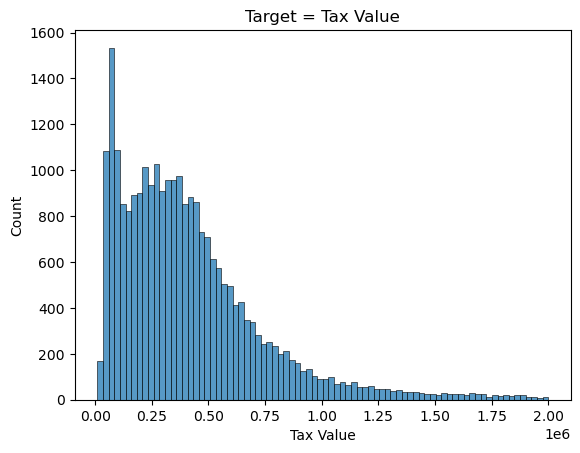

In [4]:
# View Target
eva.examine_target(train)

# Examine two independent variables against target that were kept for modeling

## Relationship between Sqft and Tax_Value
 $H_{0}$ Sqft does not influence price.
    
 $H_{a}$ Sqft does influence price.

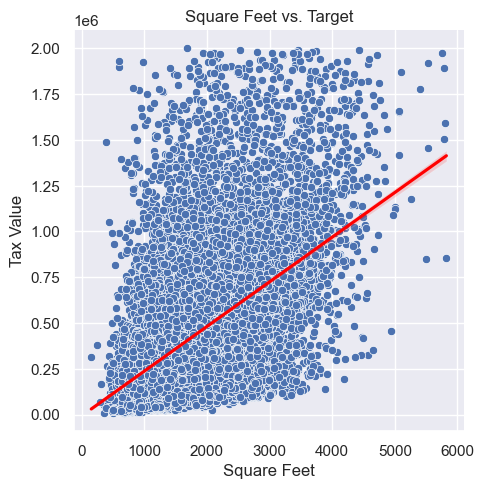

In [5]:
# Visualize Sqft and Tax_Value
eva.examine_Sqft_and_TxValue(train)

- Stats test (pearsonr) confirms there is a relationship therefore we reject the null hypothesis and can infer that Sqft does affect Tax_Value
- (r= 0.519314080044076, p = 0.0)

## Tax_Value (continuous) and Year_Built (continuous)
 $H_{0}$ Year_Built does not affect price.
    
 $H_{a}$ Year_Built does affect price.

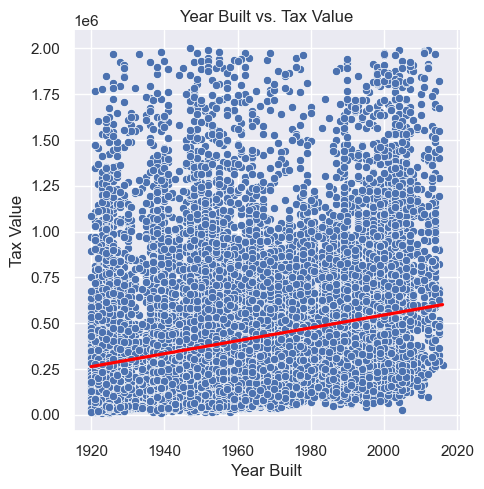

In [6]:
#Visualize Year_Built and Tax_Value
eva.examine_Year_Built_and_TxValue(train)

- Stats test (pearsonr) confirms there is a relationship therefore we reject the null hypothesis and can infer that year built does affect tax value
- (r = 0.519314080044076, p = 0.0)

# Examine two variables that were dropped

### Tax_Value (continuous) and Zip_Code (categorical) - 366 unique Zip Codes
 $H_{0}$ Zip_Code does not affect price.
    
 $H_{a}$ Zip_Code does affect price.

### Tax_Value (continuous) and City (categorical) - 164 unique Cities
 $H_{0}$ Zip_Code does not affect price.
    
 $H_{a}$ Zip_Code does affect price.

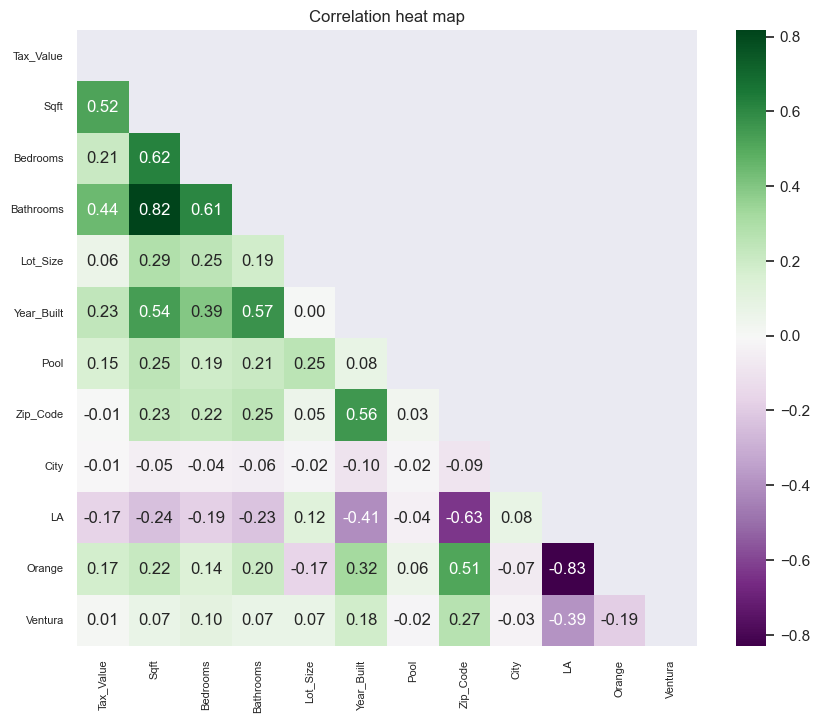

In [7]:
# Examine correlation table
eva.examine_heat_map(train)

 - Both Zip_Code and City have almost no correlation to Tax_Value, so we fail to reject the null hypothesis.

# Exploration Takeaways

- All features are statistically significant to Tax_Value, based on pvalues gained through statistical testing
- This is a second run through, so I will remove all location independent variables. This decision is based on their low correlation to the target.
- Lot size is not correlated (0.06), therefore I will not move the variable into modeling. 
- Sqft, Bathrooms, Year_Built, Bedrooms, and Pool are the highest correlated independent variables to the target (Respectively), and show statistical significance.

# Modeling


##### Measured on RMSE

In [8]:
# Create scaled data for modeling using MinMax scaler
X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test = p.scaled_df2(train, validate, test)
X_train_scaled.head()

,Sqft,Bedrooms,Bathrooms,Year_Built,Pool
15678,0.258508,0.500,0.4,0.572917,0.0
37721,0.304885,0.375,0.5,0.458333,0.0
22305,0.226591,0.500,0.4,0.364583,0.0
36063,0.407865,0.500,0.6,0.479167,0.0
1838,0.242285,0.375,0.4,0.437500,0.0


### Set and explore the target (Tax_Value)

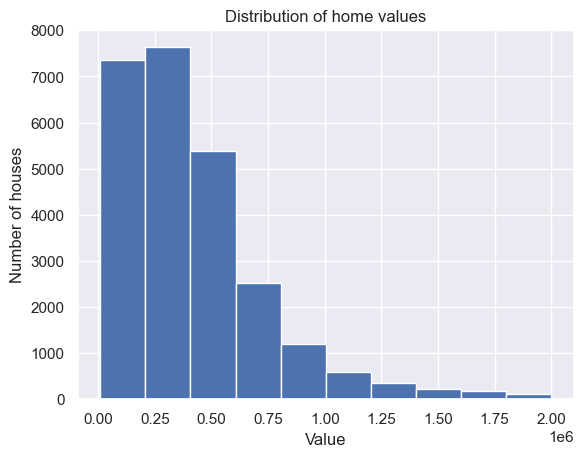

In [9]:
# Visualize baseline
eva.explore_target(y_train)

In [10]:
metrics_df = eva.baseline_model(train, y_train)
metrics_df

 Baseline model is : 414380.33


,model,rmse,r2
0,Baseline,323850.286537,2.220446e-16


# Multiple Regression
- also using Recursive Feature Eliminations

In [11]:
metrics_df = eva.multiple_regression(X_train_scaled, X_validate_scaled,y_validate,y_train, metrics_df)
metrics_df

,model,rmse,r2
0,Baseline,323850.286537,2.220446e-16
1,Multiple Regression,272662.803538,2.912945e-01


# LassoLars

In [12]:
metrics_df = eva.LassoLars_model(X_train_scaled, X_validate_scaled, y_train, y_validate, metrics_df)
metrics_df

,model,rmse,r2
0,Baseline,323850.286537,2.220446e-16
1,Multiple Regression,272662.803538,2.912945e-01
2,LassoLars,272662.752628,2.912947e-01


# Polynomial Regression

In [13]:
metrics_df = eva.polynomial_regression(X_train_scaled, X_validate_scaled, X_test_scaled, y_validate, y_train, metrics_df)
metrics_df

,model,rmse,r2
0,Baseline,323850.286537,2.220446e-16
1,Multiple Regression,272662.803538,2.912945e-01
2,LassoLars,272662.752628,2.912947e-01
3,Polynomial Regression(PR),268230.407580,3.141486e-01


# Generalized Linear Model (GLM)

In [14]:
metrics_df = eva.Generalized_Linear_Model(X_train_scaled, X_validate_scaled, y_train, y_validate, metrics_df)
metrics_df

,model,rmse,r2
0,Baseline,323850.286537,2.220446e-16
1,Multiple Regression,272662.803538,2.912945e-01
2,LassoLars,272662.752628,2.912947e-01
3,Polynomial Regression(PR),268230.407580,3.141486e-01
4,Generalized Linear Model,277390.275716,2.665061e-01


### Evaluate on Best Model

In [15]:
metrics_df, pred_pr = eva.polynomial_regression_test(X_train_scaled, X_test_scaled, y_test, y_train, metrics_df)
metrics_df

,model,rmse,r2
0,Baseline,323850.286537,2.220446e-16
1,Multiple Regression,272662.803538,2.912945e-01
2,LassoLars,272662.752628,2.912947e-01
3,Polynomial Regression(PR),268230.407580,3.141486e-01
4,Generalized Linear Model,277390.275716,2.665061e-01
5,PR on test data,270503.784329,3.008619e-01


# plot actuals vs predicted

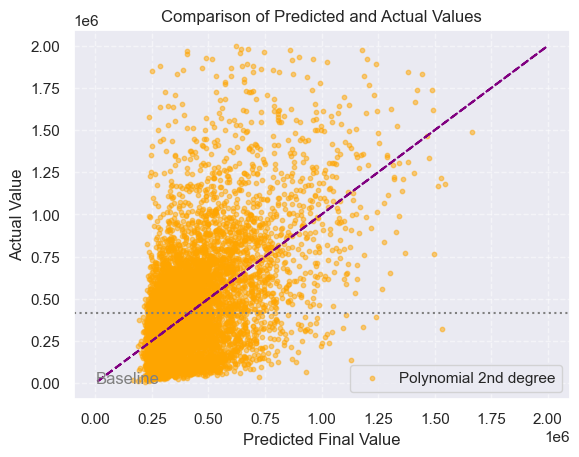

In [16]:
# Plot residuals vs. actual
eva.plot_residuals(y_train, y_test, pred_pr)


# Modeling Takeaways
- best performing model was Polynomial Regression
- the R^2 value is .31 and has the lowest RMSE of the 4 models that were ran 268230.41 on Validate
- the R^2 value is .30 and has RMSE of 270503.78 on Test

# Conclusion
- I ran many iterations of the data, and found that for this data set, polynomial regression (Degree = 3) is the best predictive model. It does perform better than the baseline RMSE (323850.286537). 

# Recommendations
- All of the selected features contribute to the assessed tax value of a home. I recommend better data collecting, to avoid massive amounts of null values in various categories (garage, story). I believe a better predictive model can be achieved with the ability to accurately add these features.

- Location always plays a large part in buying a home, LA has the cheapest on average home values.

- I believe this is due to homes being older on average in LA (1956) as compared to Orange and Ventura (1973, 1975 respectively). To further explore location, I believe further delineating City and Zip Code as well as building materials in these areas may shed light on what residents of these areas desire or not. 

# Next Steps
- There has to be a better way to delineate Zip Codes, City and other location metrics. 

- With more time I would like to further explore location variances between the three Counties.  

- I want to continue my research and analyze the relationships between multiple location features. In the Tableau map of the three counties, we can see distinct areas that are more costly in Tax Value of homes. Further investigation is required, but this will lead to better understanding in the creation of an accurate predictive model.

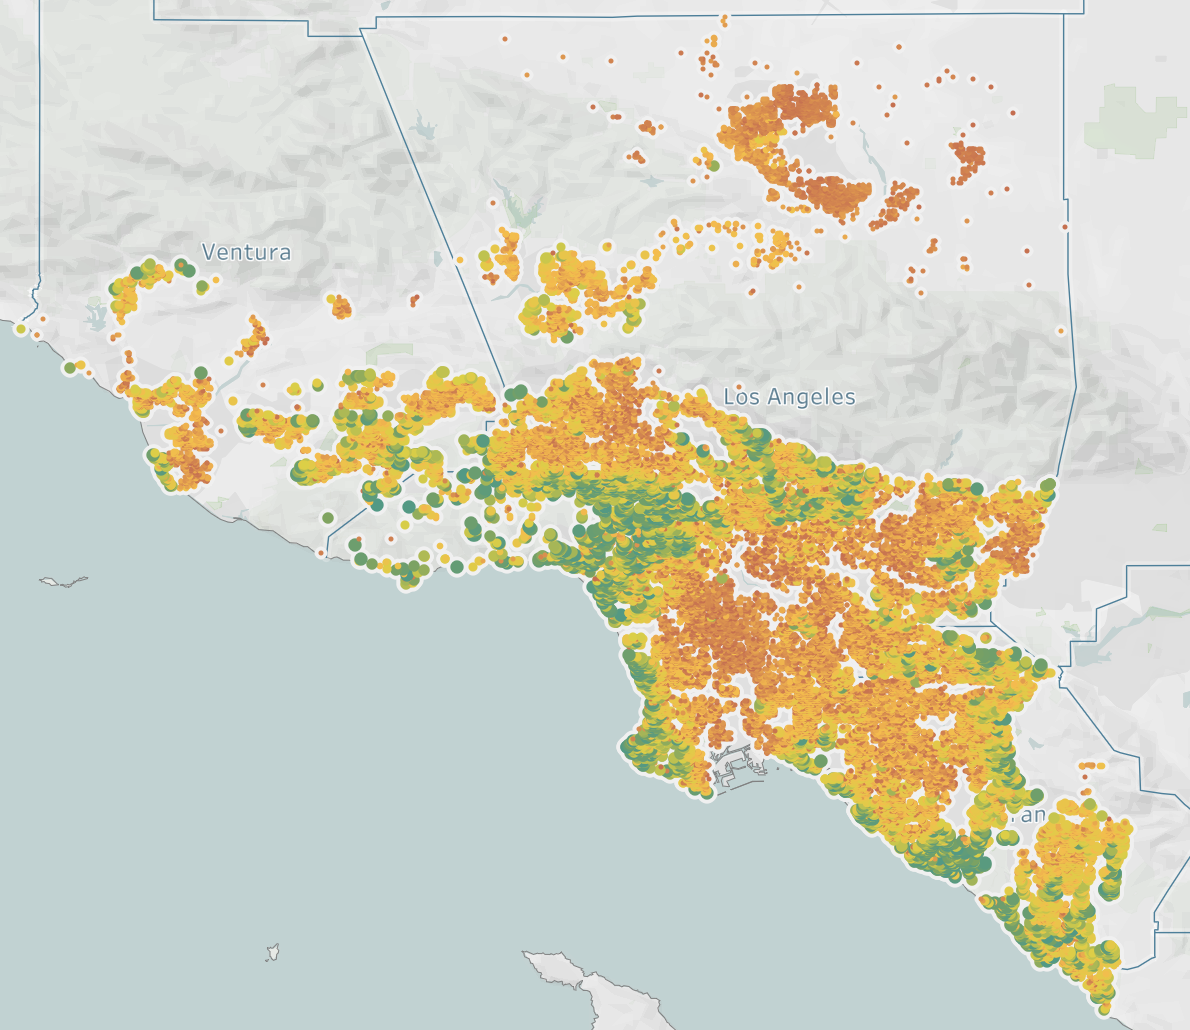